In [1]:
# Download das imagens a serem utilizadas

!wget https://www.inf.ufrgs.br/~oliveira/high_pass.bmp
!wget https://www.inf.ufrgs.br/~oliveira/low_pass.bmp
!wget http://www.inf.ufrgs.br/~oliveira/Periodic_noise_Clown.tif
!wget https://people.math.sc.edu/Burkardt/data/tif/cameraman.tif

--2021-04-09 00:47:24--  https://www.inf.ufrgs.br/~oliveira/high_pass.bmp
Resolving www.inf.ufrgs.br (www.inf.ufrgs.br)... 143.54.11.34
Connecting to www.inf.ufrgs.br (www.inf.ufrgs.br)|143.54.11.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66614 (65K) [image/x-ms-bmp]
Saving to: ‘high_pass.bmp’

high_pass.bmp       100%[===================>]  65.05K   296KB/s    in 0.2s    

2021-04-09 00:47:26 (296 KB/s) - ‘high_pass.bmp’ saved [66614/66614]

--2021-04-09 00:47:26--  https://www.inf.ufrgs.br/~oliveira/low_pass.bmp
Resolving www.inf.ufrgs.br (www.inf.ufrgs.br)... 143.54.11.34
Connecting to www.inf.ufrgs.br (www.inf.ufrgs.br)|143.54.11.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66614 (65K) [image/x-ms-bmp]
Saving to: ‘low_pass.bmp’

low_pass.bmp        100%[===================>]  65.05K   298KB/s    in 0.2s    

2021-04-09 00:47:27 (298 KB/s) - ‘low_pass.bmp’ saved [66614/66614]

--2021-04-09 00:47:27--  http://www.inf.u

In [25]:
import imageio
import numpy as np
import scipy as sp
from PIL import Image
import math
import cmath
import matplotlib.pyplot as plt

In [32]:
def plot1(image, colormap="gray", vmin=None, vmax=None):
  imgplot = plt.imshow(image, cmap=colormap, vmin=vmin, vmax=vmax)
  plt.show()

def plot2(firstimage, secondimage, firstlabel=None, secondlabel=None, colormap="gray", vmin=None, vmax=None):
  figure = plt.figure(figsize=(10,10))

  imgplot = figure.add_subplot(1,2,1)
  plt.imshow(firstimage, cmap=colormap, vmin=vmin, vmax=vmax)
  imgplot.set_xlabel(firstlabel)

  imgplot = figure.add_subplot(1,2,2)
  plt.imshow(secondimage, cmap=colormap, vmin=vmin, vmax=vmax)
  imgplot.set_xlabel(secondlabel)

def plot4(firstimage, secondimage, thirdimage, fourthimage, firstlabel=None, secondlabel=None, thirdlabel=None, fourthlabel=None, colormap="gray", vmin=None, vmax=None):
  figure = plt.figure(figsize=(15,15))

  imgplot = figure.add_subplot(1,4,1)
  plt.imshow(firstimage, cmap=colormap, vmin=vmin, vmax=vmax)
  imgplot.set_xlabel(firstlabel)

  imgplot = figure.add_subplot(1,4,2)
  plt.imshow(secondimage, cmap=colormap, vmin=vmin, vmax=vmax)
  imgplot.set_xlabel(secondlabel)

  imgplot = figure.add_subplot(1,4,3)
  plt.imshow(thirdimage, cmap=colormap, vmin=vmin, vmax=vmax)
  imgplot.set_xlabel(thirdlabel)

  imgplot = figure.add_subplot(1,4,4)
  plt.imshow(fourthimage, cmap=colormap, vmin=vmin, vmax=vmax)
  imgplot.set_xlabel(fourthlabel) 

# Questão 2 - Low Pass

### (a)

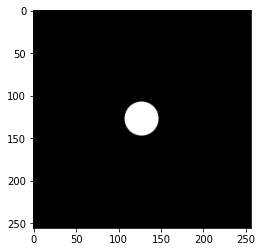

In [4]:
# Ideal frequency domain filter
img_lowpass = imageio.imread("low_pass.bmp")
plot1(img_lowpass)

### (b)

In [5]:
# Binary mask
lowpass_mask = np.uint8(img_lowpass / 255)

### (c)

In [6]:
img_cman = imageio.imread("cameraman.tif")
cman_fourier = np.fft.fft2(img_cman)

### (d)

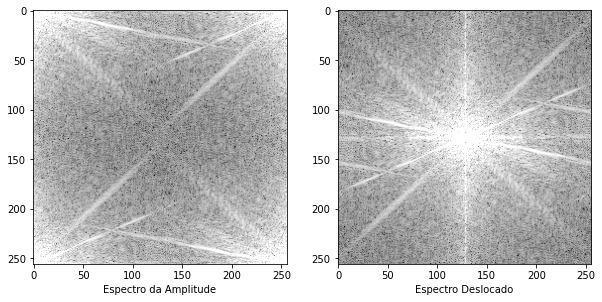

In [7]:
cman_fourier_shift = np.fft.fftshift(cman_fourier)

plot2(np.log(np.abs(cman_fourier)), np.log(np.abs(cman_fourier_shift)), "Espectro da Amplitude", "Espectro Deslocado", vmin=3, vmax=10)

### (e)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


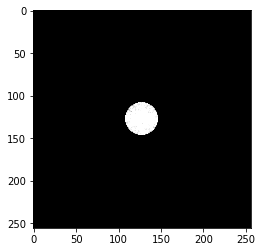

In [8]:
# Filtered Shifted Spectrum

cman_fourier_shift_filtered = np.multiply(cman_fourier_shift, np.double(lowpass_mask))
# cman_fourier_shift_filtered = np.uint8(np.multiply(cman_fourier_shift, np.double(lowpass_mask)))


plot1(np.clip(np.log(np.abs(cman_fourier_shift_filtered)), 0, 255), vmin=3, vmax=10)

### (f)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


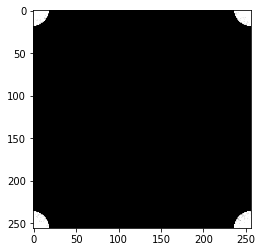

In [9]:
# Filtered Spectrum
cman_fourier_filtered = np.fft.fftshift(cman_fourier_shift_filtered)

plot1(np.clip(np.log(np.abs(cman_fourier_filtered)), 0, 255), vmin=3, vmax=10)
# plot1(cman_fourier_filtered.real), vmin=3, vmax=10)

### (g)

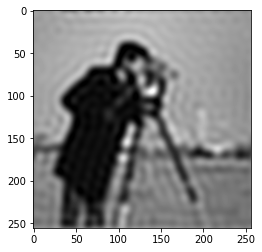

In [10]:
# Filtered Image
cman_filtered = np.fft.ifft2(cman_fourier_filtered)

plot1(np.clip(cman_filtered.real, 0, 255))

# Questão 3 - High Pass

### (a)

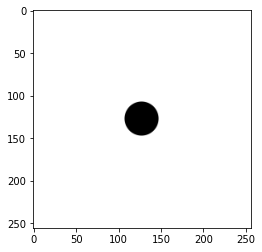

In [11]:
img_highpass = imageio.imread("high_pass.bmp")
plot1(img_highpass)

### (b)

In [12]:
# Binary mask
highpass_mask = img_highpass / 255

### (c)

In [13]:
img_cman = imageio.imread("cameraman.tif")
cman_fourier = np.fft.fft2(img_cman)

### (d)

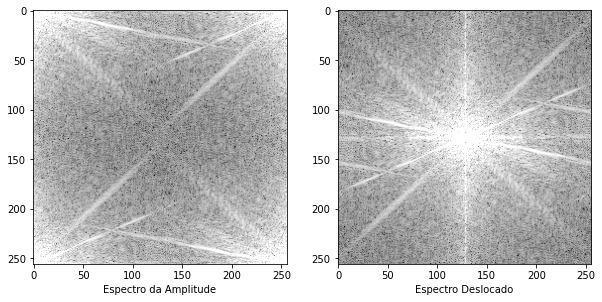

In [14]:
cman_fourier_shift = np.fft.fftshift(cman_fourier)

plot2(np.log(np.abs(cman_fourier)), np.log(np.abs(cman_fourier_shift)), "Espectro da Amplitude", "Espectro Deslocado", vmin=3, vmax=10)

(e)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


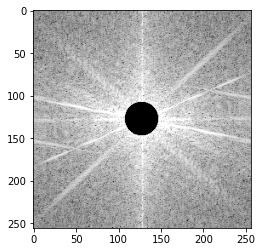

In [15]:
# Filtered Shifted Spectrum
cman_fourier_shift_filtered = np.multiply(cman_fourier_shift, np.double(highpass_mask))

# parece certo
plot1(np.clip(np.log(np.abs(cman_fourier_shift_filtered)), 0, 255), vmin=3, vmax=10)
# plot1(cman_fourier_shift_filtered.real), vmin=3, vmax=10)

### (f)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


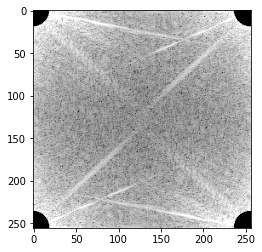

In [16]:
# Filtered Spectrum
cman_fourier_filtered = np.fft.fftshift(cman_fourier_shift_filtered)

# parece errado, era pra estar tudo branco com os cantos pretos.
plot1(np.clip(np.log(np.abs(cman_fourier_filtered)), 0, 255), vmin=3, vmax=10)
# plot1(cman_fourier_filtered.real), vmin=3, vmax=10)

### (g)

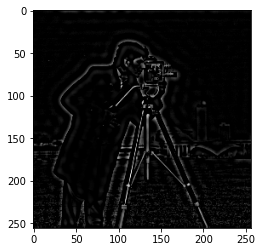

In [17]:
# Filtered Image
cman_filtered = np.fft.ifft2(cman_fourier_filtered)

plot1(np.clip(cman_filtered.real, 0, 255))

# Questão 4

(294, 294)


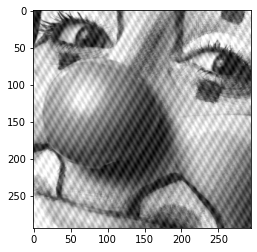

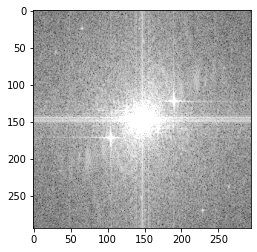

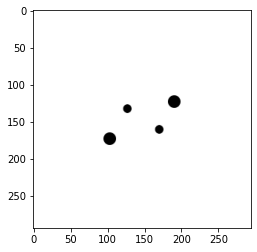

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


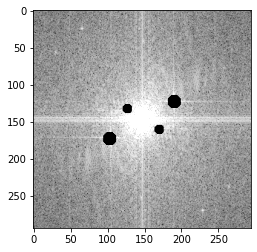

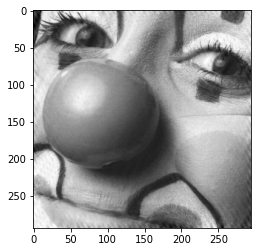

In [38]:
img_clown = imageio.imread("Periodic_noise_Clown.tif")

plot1(img_clown)

# fourier
clown_ft = np.fft.fft2(img_clown)

# shift
clown_ft_shifted = np.fft.fftshift(clown_ft)
plot1(np.log(np.abs(clown_ft_shifted)), vmin=3, vmax=10)

# create mask
clown_mask = imageio.imread("spectrum_clown.bmp")
plot1(clown_mask)
clown_mask = np.uint8(clown_mask/255)
# clown_mask = rgb2gray(clown_mask)

# multiply mask
clown_ft_shifted_filtered = np.multiply(clown_ft_shifted, np.double(clown_mask))
plot1(np.clip(np.log(np.abs(clown_ft_shifted_filtered)), 0, 255), vmin=3, vmax=10)

# shift again
clown_ft_filtered = np.fft.fftshift(clown_ft_shifted_filtered)

# inverse
clown = np.fft.ifft2(clown_ft_filtered)
clown = np.clip(clown.real, 0, 255)

plot1(clown)

# Questão 5

### F(u,v)

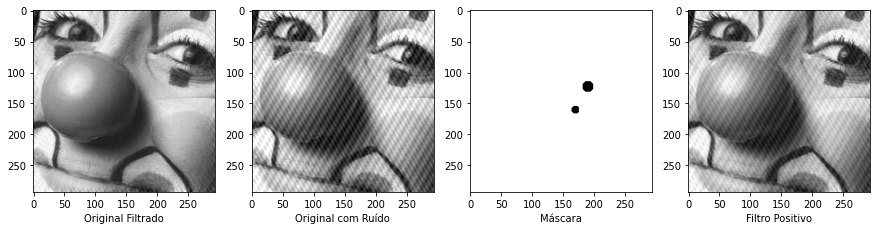

In [43]:
# fourier shifted
clown_fts = np.fft.fftshift(np.fft.fft2(img_clown))

# create mask
clown_mask = imageio.imread("spectrum_positivo.bmp")
clown_mask = np.uint8(clown_mask/255)

# multiply mask, shift and inverse fourier
clown_pos = np.clip(np.fft.ifft2(np.fft.fftshift(np.multiply(clown_fts, np.double(clown_mask)))), 0, 255)

plot4(clown.real, img_clown, clown_mask, clown_pos.real, "Original Filtrado", "Original com Ruído", "Máscara", "Filtro Positivo")

### F(-u, -v)

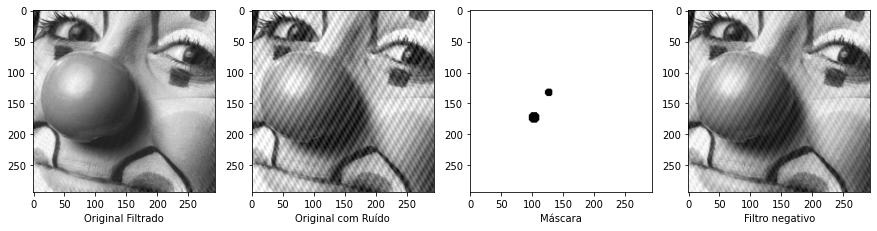

In [44]:
# fourier shifted
clown_fts = np.fft.fftshift(np.fft.fft2(img_clown))

# create mask
clown_mask = imageio.imread("spectrum_negativo.bmp")
clown_mask = np.uint8(clown_mask/255)

# multiply mask, shift and inverse fourier
clown_neg = np.clip(np.fft.ifft2(np.fft.fftshift(np.multiply(clown_fts, np.double(clown_mask)))), 0, 255)

plot4(clown.real, img_clown, clown_mask, clown_neg.real, "Original Filtrado", "Original com Ruído", "Máscara", "Filtro negativo")